# Decision Tree Classifiers

## Theory -- Explained by Examples.
### Workings of a Binary Classifier

Predict people go golfing, based on people that went golfing under certain weather conditions.

![Golfing](images/golfing.png)

## Objective
Separate classes maximally in a tree structure, i.e. minimize _Entropy_, or maximize _Information Gain_.

![Golfing](images/golfing.png)

## A look at the data
- Features = ['outlook', 'temperature', 'humidity', 'wind']
- Feature values (i.e. 'outlook') = ['sunny', 'overcast', 'rainy']
- Target = ['play']
- Target values = ['yes', 'no']  (hence 'binary' classification)

- play golf?
  - Outlook
    - sunny   : yes=3, no=2
    - overcast: yes=4, no=0
    - sunny   : yes=2, no=3
  - Temperature
    - hot : yes=2, no=2
    - mild: yes=...
    
The Shannon Entropy Measure

$${\bf H}( {\bf X}) = - \sum_{i=1}^n P(x_i)\textrm{log}_2P(x_i),$$

- If data _all_ true, or _all_ false, then $H = 0$ (minimal entropy, or "mess" in the data set).
- If data are perfectly mixed (equally divided), then $H = 1$ (maximal entropy).

## Shannon Entropy, and entropy in data.
The Shannon Entropy is used to measure how clearly data are separable.

It is a part of finding out whether there is a _signal_ in the data.

$${\bf H}( {\bf X}) = - \sum_{i=1}^n P(x_i)\textrm{log}_2P(x_i),$$

- If data _all_ true, or _all_ false, then $H = 0$ (minimal entropy, or minimal "mess" in the data set).
- If data are perfectly mixed (equally divided), then $H = 1$ (maximal entropy).

We have 9 times 'yes' and 5 times 'no' for label 'play'. Leading to 

$$H('play') = - 0.64*Log2(0.64) - 0.36*Log2(0.36) = 0.94,$$

since 9+5=14, 9/14=0.64, and 5/14=0.36.


## Tree Node Construction
- Iterate through _all_ features (outlook, temperature, etc...)
- For _all_ features iterate through _all_ ranges of values

Then we get the following result:  

## Information Gain
Is defined as 

$$ \mathcal{G} \equiv {\bf H}({\bf X}) - {\bf E}({\bf T},{\bf X}),$$

where 

$${\bf E}({\bf T},{\bf X}) = \sum_x P({\bf x})E({\bf x}).$$

The Information Gain for 'outlook', with our table data becomes:

$$ \frac{5}{14} \cdot 0.971 \frac{5}{14} \cdot 0.0 \frac{5}{14} \cdot 0.971 = 0.247 .$$

For all the features, we get 
- **0.247 for 'outlook'**
- **0.029 for 'temperature'**
- **0.152 for 'humidity'**
- **0.048 for 'wind'**

Concluding that the decision should first split on the 'outlook' feature, since this yields the most information.

### Training "result"
We get a tree something like this:
![TreeResult](images/tree_result.png)

# Classifying the Iris Data Set
### Objective
- get the data
- select the features
- train a model (make the tree)
- plot the tree
- understand the idea

## Introducing the iris dataset

![Iris](images/03_iris.png)

- 50 samples of 3 different species of iris (150 samples total)\n",
- Measurements: sepal length, sepal width, petal length, petal width

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Select number of features (btween 2 and 4, really).
n_features = 3

In [10]:
X = iris.data[:,-n_features:]
iris.feature_names = iris.feature_names[-n_features:]

# Get the target values (classes)
y = iris.target

In [12]:
X, y

(array([[3.5, 1.4, 0.2],
        [3. , 1.4, 0.2],
        [3.2, 1.3, 0.2],
        [3.1, 1.5, 0.2],
        [3.6, 1.4, 0.2],
        [3.9, 1.7, 0.4],
        [3.4, 1.4, 0.3],
        [3.4, 1.5, 0.2],
        [2.9, 1.4, 0.2],
        [3.1, 1.5, 0.1],
        [3.7, 1.5, 0.2],
        [3.4, 1.6, 0.2],
        [3. , 1.4, 0.1],
        [3. , 1.1, 0.1],
        [4. , 1.2, 0.2],
        [4.4, 1.5, 0.4],
        [3.9, 1.3, 0.4],
        [3.5, 1.4, 0.3],
        [3.8, 1.7, 0.3],
        [3.8, 1.5, 0.3],
        [3.4, 1.7, 0.2],
        [3.7, 1.5, 0.4],
        [3.6, 1. , 0.2],
        [3.3, 1.7, 0.5],
        [3.4, 1.9, 0.2],
        [3. , 1.6, 0.2],
        [3.4, 1.6, 0.4],
        [3.5, 1.5, 0.2],
        [3.4, 1.4, 0.2],
        [3.2, 1.6, 0.2],
        [3.1, 1.6, 0.2],
        [3.4, 1.5, 0.4],
        [4.1, 1.5, 0.1],
        [4.2, 1.4, 0.2],
        [3.1, 1.5, 0.2],
        [3.2, 1.2, 0.2],
        [3.5, 1.3, 0.2],
        [3.6, 1.4, 0.1],
        [3. , 1.3, 0.2],
        [3.4, 1.5, 0.2],


In [ ]:
iris.feature_names

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=3)

In [14]:
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Get the _'Graphviz'_ package with your favourite package manager: 

`$ conda install graphviz`

Then convert the graph to PNG in your command line:

`$ dot -Tpng iris_tree.dot -o iris_tree.png`

In [16]:
from sklearn.tree import export_graphviz
import io

In [17]:
export_graphviz(
    tree_clf, 
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[-n_features:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


Or we can do it in the notebook directly...
...after we install the graphviz in the right place:

`$ conda install python-graphviz`

In [18]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(tree_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

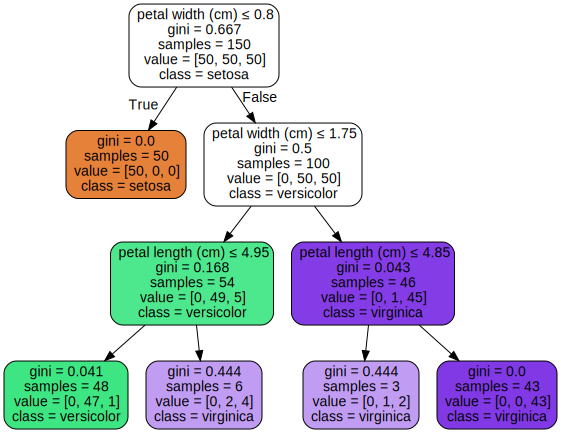

In [19]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [20]:
# Make a prediction on the data.
prediction = tree_clf.predict(X)

In [21]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
len(prediction)

150

In [24]:
prediction - iris.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Strange; should have been all zeroes.... but why?

## Exercise
Find some data, build a binary (or multiclass) decision tree classifier.
Try Kaggle for data, or use the "safe" choice Scikit:

**Kaggle:** https://www.kaggle.com/datasets
**SciKit:** https://scikit-learn.org/stable/auto_examples/index.html#classification



### Interesting prospect
... by the way, Kaggle offers rewarded competitions, here's one from LANL:
https://www.kaggle.com/c/LANL-Earthquake-Prediction#description

#### Why don't we go try out as a team?? -- just a thought. We could try it as an on-the-side effort...
I am thinking; we have computer expertise in abundance (you guys in class!), we have AI expertise in abundance (Jens, in particular), and we have a bit of physics know-how (me) to put to the show. So what do you think, do you have some spare time...??            :-) 

In [ ]:
from sklearn.model_selection import train_test_split